In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt

In [14]:
train_data = pd.read_table('sentences.txt')

In [15]:
train_data[:5] # 상위 5개 출력

,Chapter
0,Structures (구조)
1,Operating System Concepts – 10th Edition
2,"Silberschatz, Galvin and Gagne ©2018Chapter 2:..."
3,❖ 운영체제 서비스 (Operating System Services)
4,❖ 운영체제 사용자 인터페이스 (User Operating System Interf...


In [16]:
print(len(train_data)) # 리뷰 개수 출력

891


In [17]:
# NULL 값 존재 유무
print(train_data.isnull().values.any())

False


In [18]:
train_data = train_data.dropna(how = 'any') # Null 값이 존재하는 행 제거
print(train_data.isnull().values.any()) # Null 값이 존재하는지 확인

False


In [19]:
print(len(train_data)) # 리뷰 개수 출력

891


In [8]:
# 정규 표현식을 통한 한글 외 문자 제거 -> 중요 키워드는 오히려 영어 로마자로 되어 있는 경우 있으므로 지우면 안됨!
# train_data['Chapter'] = train_data['Chapter'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

In [20]:
train_data[0:] # 상위 5개 출력

,Chapter
0,Structures (구조)
1,Operating System Concepts – 10th Edition
2,"Silberschatz, Galvin and Gagne ©2018Chapter 2:..."
3,❖ 운영체제 서비스 (Operating System Services)
4,❖ 운영체제 사용자 인터페이스 (User Operating System Interf...
...,...
886,2.63
887,"Silberschatz, Galvin and Gagne ©2018"
888,"Silberschatz, Galvin and Gagne ©2018End of Cha..."
889,Operating System Concepts – 10th Edition


In [21]:
# NULL 값 존재 유무
print(train_data.isnull().values.any())

False


In [22]:
# 불용어 정의
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

# 형태소 분석기 OKT를 사용한 토큰화 작업 (다소 시간 소요)
okt = Okt()

# 좀 시간 걸릴수 있음
tokenized_data = []
for sentence in train_data['Chapter']:
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    tokenized_data.append(stopwords_removed_sentence)

리뷰의 최대 길이 : 31
리뷰의 평균 길이 : 6.780022446689113


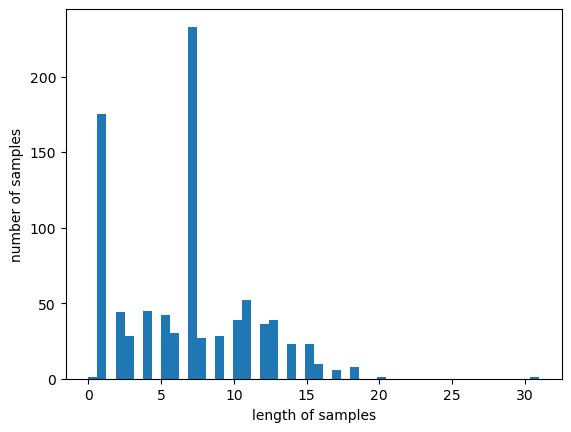

In [23]:
# 리뷰 길이 분포 확인
print('리뷰의 최대 길이 :',max(len(review) for review in tokenized_data))
print('리뷰의 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(review) for review in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [24]:
tokenized_data[:5] # 상위 5개 출력

[['Structures', '(', '구조', ')'],
 ['Operating', 'System', 'Concepts', '–', '10', 'th', 'Edition'],
 ['Silberschatz',
  ',',
  'Galvin',
  'and',
  'Gagne',
  '©',
  '2018',
  'Chapter',
  '2',
  ':',
  'Operating',
  '-',
  'System',
  'Structures'],
 ['❖', '운영체제', '서비스', '(', 'Operating', 'System', 'Services', ')'],
 ['❖',
  '운영체제',
  '사용자',
  '인터페이스',
  '(',
  'User',
  'Operating',
  'System',
  'Interface',
  ')']]

In [25]:
from gensim.models import Word2Vec
model = Word2Vec(sentences = tokenized_data, vector_size = 100, window = 5, min_count = 5, workers = 4, sg = 0)

In [26]:
# 완성된 임베딩 매트릭스의 크기 확인
model.wv.vectors.shape

(170, 100)

In [27]:
type(model.wv.vectors)

numpy.ndarray

In [28]:
# '자원'과 유사한 단어들 뽑아보기
print(model.wv.most_similar("자원"))

[('운영체제', 0.9479154348373413), ('인', 0.944948673248291), ('되다', 0.9446166753768921), (',', 0.9445696473121643), (':', 0.9442222118377686), ('OS', 0.9437145590782166), ('(', 0.9431517124176025), (')', 0.941857635974884), ('적재', 0.9407109022140503), ('l', 0.9405134916305542)]


In [30]:
# 'API'과 유사한 단어들 뽑아보기
print(model.wv.most_similar("API"))

[(',', 0.9531847834587097), ('을', 0.9524460434913635), (')', 0.9510533213615417), ('l', 0.9504212141036987), ('(', 0.9497171640396118), ('운영체제', 0.9490477442741394), ('시스템', 0.9485232830047607), ('Silberschatz', 0.9470431804656982), ('커널', 0.946779727935791), ('Gagne', 0.9463653564453125)]


In [ ]:
word_vectors = model.wv # 벡터화된 문장들
vocabs = word_vectors.vocab.keys() # 단어들
word_vectors_list = [word_vectors[v] for v in vocabs]

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))
plt.plot([0, 1], [0, 1], label="test")
plt.legend()
plt.show()

In [31]:
from sklearn.cluster import KMeans
import numpy as np
# 랜덤하게 실행되는 부분들에 대해 다음에 실행해도 동일한 결과를 얻기 위해 설정
seed = 11
rng = np.random.default_rng(seed)

k = 5
kmeans = KMeans(n_clusters=k, random_state=seed) # k-평균++ 초기화 사용

In [32]:
y_pred = kmeans.fit_predict(model.wv.vectors) # 클러스터링 결과 각 샘플의 클러스터 레이블을 리턴 받으려면 fit_predict 사용
y_pred

array([1, 1, 2, 1, 2, 3, 3, 0, 0, 3, 3, 3, 3, 0, 0, 0, 3, 2, 1, 3, 3, 2,
       3, 2, 2, 3, 3, 3, 2, 2, 2, 2, 2, 3, 2, 3, 2, 0, 3, 2, 2, 3, 3, 3,
       2, 2, 2, 2, 3, 2, 2, 2, 4, 2, 0, 2, 2, 3, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 0, 0, 2, 0, 0, 2, 0, 2, 2, 4, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 0,
       2, 4, 0, 0, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 4,
       0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 2, 2, 4, 4, 4, 4, 4, 4, 4, 0,
       4, 0, 4, 4, 4, 4, 4, 0, 4, 4, 0, 4, 4, 4, 0, 4, 4, 4, 0, 4, 0, 0,
       0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0])

In [33]:
kmeans.fit(model.wv.vectors) # 클러스터링을 수행하고 그 결과를 객체의 속성에 저장하는 것까지만 수행하려면 fit 사용

KMeans(n_clusters=5, random_state=11)

In [34]:
kmeans.labels_ # 클러스터링 수행 결과가 labels_ 속성에 저장됨

array([1, 1, 2, 1, 2, 3, 3, 0, 0, 3, 3, 3, 3, 0, 0, 0, 3, 2, 1, 3, 3, 2,
       3, 2, 2, 3, 3, 3, 2, 2, 2, 2, 2, 3, 2, 3, 2, 0, 3, 2, 2, 3, 3, 3,
       2, 2, 2, 2, 3, 2, 2, 2, 4, 2, 0, 2, 2, 3, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 0, 0, 2, 0, 0, 2, 0, 2, 2, 4, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 0,
       2, 4, 0, 0, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 4,
       0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 2, 2, 4, 4, 4, 4, 4, 4, 4, 0,
       4, 0, 4, 4, 4, 4, 4, 0, 4, 4, 0, 4, 4, 4, 0, 4, 4, 4, 0, 4, 0, 0,
       0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0])

In [35]:
# 각 클러스터의 센트로이드(중심)
kmeans.cluster_centers_

array([[-1.64572999e-03,  1.61261880e-03, -4.42165928e-03,
        -2.49446020e-04,  1.19351069e-04, -3.14263441e-02,
         2.64652707e-02,  4.86933812e-02, -2.37152837e-02,
        -1.09495036e-02, -8.77468847e-03, -2.75464579e-02,
        -1.82388443e-03,  1.83338523e-02,  2.68221763e-03,
        -8.49029399e-04,  1.66997984e-02, -1.20555731e-02,
        -8.80276877e-03, -4.72267903e-02,  1.41533129e-02,
         4.93880734e-03,  4.03997116e-03, -1.81828104e-02,
        -9.23796929e-03,  2.84647918e-04, -1.46428254e-02,
        -2.03463379e-02, -1.18093546e-02,  1.94801320e-03,
         3.04434989e-02, -2.20854790e-03,  1.81865357e-02,
        -3.01253032e-02, -9.81119834e-03,  3.02208904e-02,
         3.82384332e-03, -9.11317207e-03,  6.72112103e-04,
        -2.90810652e-02,  1.22586014e-02, -2.28550937e-02,
        -7.57969543e-03,  1.04086176e-02,  1.78980734e-02,
        -1.51730352e-03, -1.86953358e-02, -6.19004713e-03,
         1.67878456e-02,  9.24798753e-03,  7.87998363e-0

In [36]:
# 이너셔(inertia): 각 샘플과 가장 가까운 센트로이드 사이의 평균 제곱 거리
kmeans.inertia_

0.7787775993347168

In [37]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(model.wv.vectors)

DBSCAN(eps=0.05)

In [38]:
# 각 샘플의 레이블: 핵심 샘플들의 인덱스 또는 이상치 인덱스(-1)
dbscan.labels_[:10]

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [39]:
# 핵심 샘플들의 인덱스
dbscan.core_sample_indices_[:10]

array([], dtype=int64)

In [40]:
# 핵심 샘플들
dbscan.components_[:5]

array([], shape=(0, 100), dtype=float64)

In [41]:
print(len(dbscan.core_sample_indices_))
print(len(dbscan.components_))

0
0


In [42]:
# scikit-learn을 이용한 병합 클러스터링
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=5, linkage="complete")
agg = agg.fit(model.wv.vectors)